# Predicting Breast Cancer - Exploratory Data Analysis

## Capstone Project Two: Springboard Data Science Career Track 

### Notebook by Manthan Desai

## Introduction:

## 1. Problem Statement:

Breast cancer is an increasingly common and dangerous disease for women that forms in the cells of the breast. Nearly 12% of women worldwide are affected by the disease. Early detection remains vital for successful treatment of the disease and improved outcomes. Machine learning algorithms can help improve the accuracy of breast cancer detection by analyzing large-scale datasets for relevant trends and most important features. 

In the context of this problem, how can tumors be classified as benign or malignant with a minimum accuracy of 80% based on nine features that describe the tumor?

## 2. The Data:

The dataset is acquired from OpenML.org
(https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfInstances=between_10000_100000&id=251). 

The dataset is comprised of the follwing fields:

 - id - Patient ID
 - Clump_Thickness - Indicates grouping of cancer cells in multilayer (Values range from 1-10).
 - Cell_Size_Uniformity - Indicates metastasis to lymph nodes (Values range from 1-10).
 - Cell_Shape_Uniformity - Identifies cancerous cells of varying size (Values range from 1-10).
 - Marginal_Adhesion - Quantifies loss of adhesion in cells (Values range from 1-10).
 - Single_Epi_Cell_Size - Quantifies the size of the epithelial cells (Values range from 1-10).
 - Bare_Nuclei - Quantifies the presence of bare nuclei in the cells (Values range from 1-10).
 - Bland_Chromatin - Quantifies the presence of bland chromatin in the cells (Values range from 1-10).
 - Normal Nucleoli - Quantifies the presence of normal nucleoli in the cells (Values range from 1-10).
 - Mitoses - Quantifies the stage of Mitoses in the cells (Values range from 1-10).
 - Class - The target variable that qualifies tumors as malignant (1) or benign (0) 

## 3. Library Imports and Load the Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
bc_data = pd.read_csv('../data/bc_data_cleaned.csv')

In [3]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39317 entries, 0 to 39316
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     39317 non-null  int64  
 1   Clump_Thickness        39317 non-null  float64
 2   Cell_Size_Uniformity   39317 non-null  float64
 3   Cell_Shape_Uniformity  39317 non-null  float64
 4   Marginal_Adhesion      39317 non-null  float64
 5   Single_Epi_Cell_Size   39317 non-null  float64
 6   Bare_Nuclei            39317 non-null  float64
 7   Bland_Chromatin        39317 non-null  float64
 8   Normal_Nucleoli        39317 non-null  float64
 9   Mitoses                39317 non-null  float64
 10  Class                  39317 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 3.3+ MB


In [4]:
bc_data.head()

id  Clump_Thickness  Cell_Size_Uniformity  Cell_Shape_Uniformity  \
0   1         7.581819              9.745087               1.000000   
1   2         5.210921              8.169596               7.841875   
2   3         4.000000              4.594296               2.330380   
3   4         2.428871              1.000000               1.000000   
4   5         8.855971              2.697539               6.047068   

   Marginal_Adhesion  Single_Epi_Cell_Size  Bare_Nuclei  Bland_Chromatin  \
0           4.503410              7.039930         10.0         4.412282   
1           6.033275              4.269619         10.0         4.236312   
2           2.000000              3.000000          1.0        10.701823   
3           1.000000              4.099291          1.0         2.000000   
4           3.301891              3.000000          1.0         5.297592   

   Normal_Nucleoli   Mitoses      Class  
0        10.000000  5.055266  malignant  
1         4.845350  1.000000  malignant  
2         1.101305  1.000000     benign  
3         1.000000  1.000000     benign  
4         4.104791  3.115741  malignant

## 4. Data Exploration

In [5]:
class_counts = bc_data['Class'].value_counts()
class_counts

benign       25796
malignant    13521
Name: Class, dtype: int64

In [6]:
class_percentages = pd.Series([(x / bc_data.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    65.610296
1    34.389704
dtype: float64

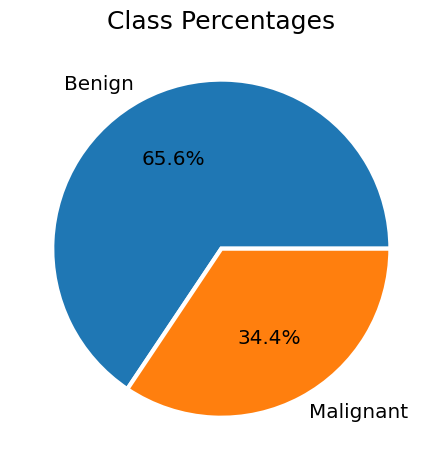

In [7]:
#Construct a pie chart of the class value distributions
fig, ax = plt.subplots()
labels = ['Benign','Malignant']
ax.pie(class_percentages, labels=labels, autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
ax.set_title('Class Percentages',fontsize=18)
plt.tight_layout()

The data is imbalanced with respect to the class labels because there are ~2x as many benign cases as malignant.

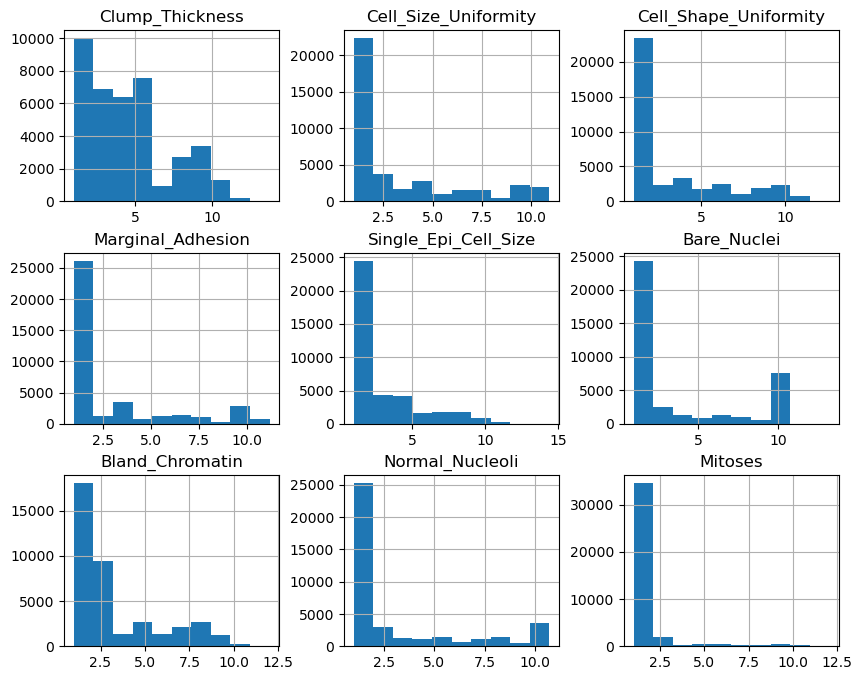

In [8]:
bc_data.drop(['id'],axis=1).hist(figsize = (10,8))
plt.show()

At first glance, the Clump_Thickness feature is evenly distributed to some extent. The rest of the features are heavily skewed to the right.

### Feature 1: Clump_Thickness

In [9]:
#summary statistics
bc_data['Clump_Thickness'].describe()

count    39317.000000
mean         4.393465
std          2.811865
min          1.000000
25%          2.244085
50%          4.000000
75%          5.629741
max         13.717991
Name: Clump_Thickness, dtype: float64

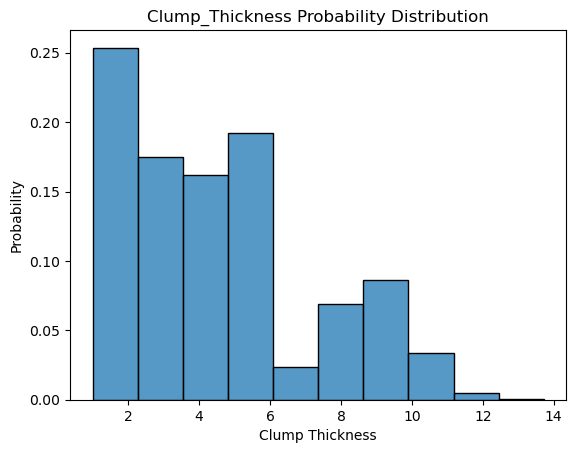

In [10]:
sns.histplot(data=bc_data, x='Clump_Thickness', stat='probability', bins=10)
plt.xlabel("Clump Thickness")
plt.ylabel("Probability")
plt.title('Clump_Thickness Probability Distribution')
plt.show()

#### Relationship between Clump Thickness and Tumor Class

In [11]:
bc_data.groupby('Class')['Clump_Thickness'].describe().round(2)

count  mean   std  min   25%   50%   75%    max
Class                                                       
benign     25796.0  2.96  1.73  1.0  1.00  2.80  4.00  12.17
malignant  13521.0  7.12  2.43  1.0  5.16  7.74  9.11  13.72

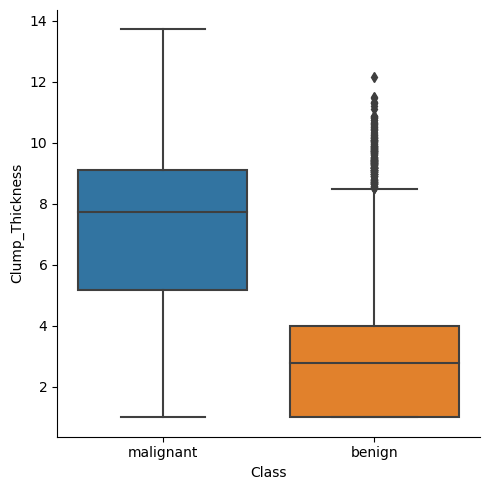

In [12]:
sns.catplot(x="Class", y="Clump_Thickness", data=bc_data, kind="box")

     Malignant Bins  Tumor Bins
1               194        8143
2                68         566
3               561        5435
4               940        5789
5              1059        1676
6              2501        3737
7               483         173
8              1484          59
9              2552          70
10+            3679         148


Text(0.5, 1.0, 'Clump_Thickness Feature Distribution grouped by the Tumor Class')

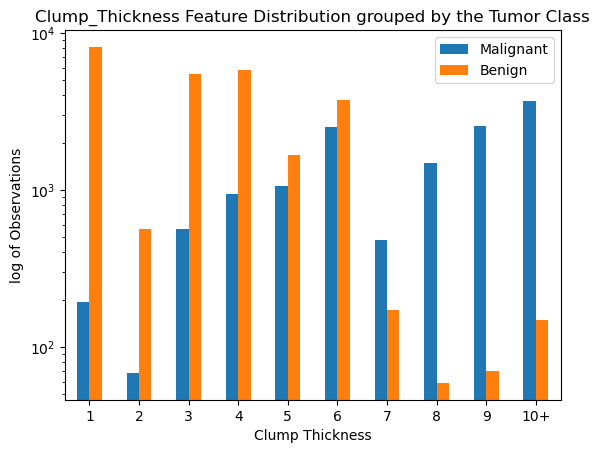

In [13]:
bin_range = ['1', '2','3', '4', '5', '6', '7', '8', '9', '10+']
malignant_bins = pd.cut(bc_data.groupby('Class').get_group('malignant')['Clump_Thickness'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)
benign_bins = pd.cut(bc_data.groupby('Class').get_group('benign')['Clump_Thickness'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)

plot_df = pd.DataFrame({'Malignant Bins': malignant_bins.value_counts(sort=False),'Tumor Bins': benign_bins.value_counts(sort=False)}, index=bin_range)
print(plot_df)

#plot a bart chart of the binned data
plot_df.plot.bar(rot=0)
ax = plt.gca()
plt.yscale('log')
plt.legend(['Malignant', 'Benign'])
plt.xlabel('Clump Thickness')
plt.ylabel('log of Observations')
plt.title('Clump_Thickness Feature Distribution grouped by the Tumor Class')

### Feature 2: Cell Shape Uniformity

In [14]:
bc_data['Cell_Shape_Uniformity'].describe()

count    39317.000000
mean         3.203115
std          2.975756
min          1.000000
25%          1.000000
50%          1.000000
75%          4.965623
max         12.604289
Name: Cell_Shape_Uniformity, dtype: float64

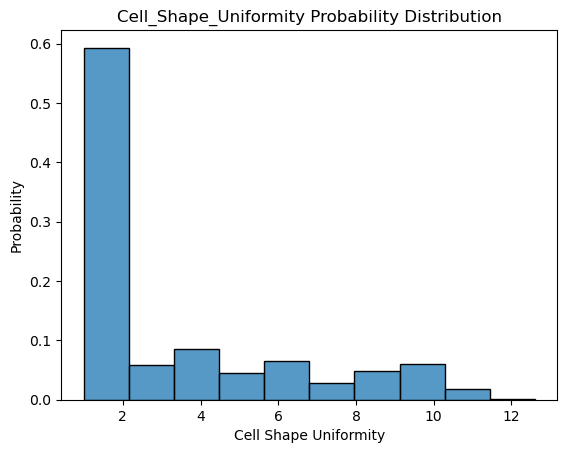

In [15]:
sns.histplot(data=bc_data, x='Cell_Shape_Uniformity', stat='probability', bins=10)
plt.xlabel("Cell Shape Uniformity")
plt.ylabel("Probability")
plt.title('Cell_Shape_Uniformity Probability Distribution')
plt.show()

#### Relationship between Cell Shape Uniformity and Tumor Class

In [16]:
bc_data.groupby('Class')['Cell_Shape_Uniformity'].describe().round(2)

count  mean   std  min   25%   50%   75%    max
Class                                                       
benign     25796.0  1.50  1.18  1.0  1.00  1.00  1.00  11.61
malignant  13521.0  6.45  2.65  1.0  4.04  6.27  8.95  12.60

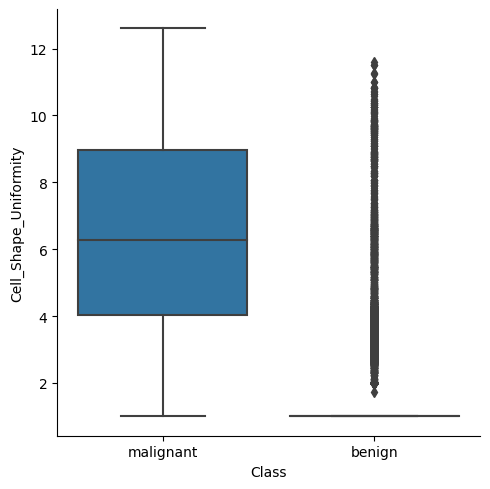

In [17]:
sns.catplot(x="Class", y="Cell_Shape_Uniformity", data=bc_data, kind="box")

     Malignant Bins  Tumor Bins
1               213       19627
2               501        2959
3               580         504
4              2032        1726
5               983         409
6              1856         170
7              1784         194
8               766          51
9              1529          55
10+            3277         101


Text(0.5, 1.0, 'Cell_Shape_Uniformity Feature Distribution grouped by the Tumor Class')

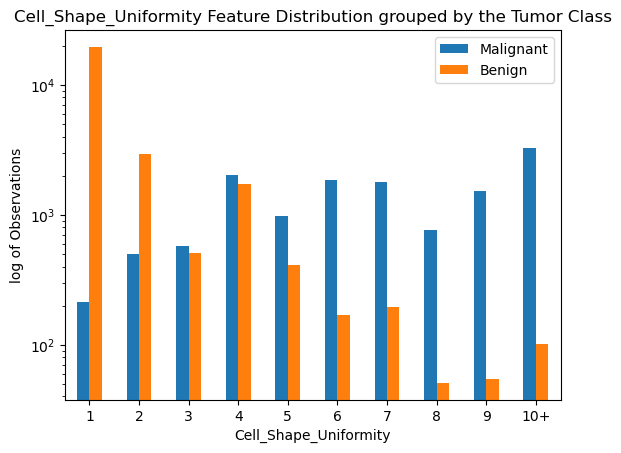

In [18]:
bin_range = ['1', '2','3', '4', '5', '6', '7', '8', '9', '10+']
malignant_bins = pd.cut(bc_data.groupby('Class').get_group('malignant')['Cell_Shape_Uniformity'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)
benign_bins = pd.cut(bc_data.groupby('Class').get_group('benign')['Cell_Shape_Uniformity'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)

plot_df = pd.DataFrame({'Malignant Bins': malignant_bins.value_counts(sort=False),'Tumor Bins': benign_bins.value_counts(sort=False)}, index=bin_range)
print(plot_df)

#plot a bart chart of the binned data
plot_df.plot.bar(rot=0)
ax = plt.gca()
plt.legend(['Malignant', 'Benign'])
plt.yscale('log')
plt.xlabel('Cell_Shape_Uniformity')
plt.ylabel('log of Observations')
plt.title('Cell_Shape_Uniformity Feature Distribution grouped by the Tumor Class')

### Feature 3: Cell Size Uniformity

In [19]:
bc_data['Cell_Size_Uniformity'].describe()

count    39317.000000
mean         3.129445
std          3.039286
min          1.000000
25%          1.000000
50%          1.000000
75%          4.553463
max         10.933095
Name: Cell_Size_Uniformity, dtype: float64

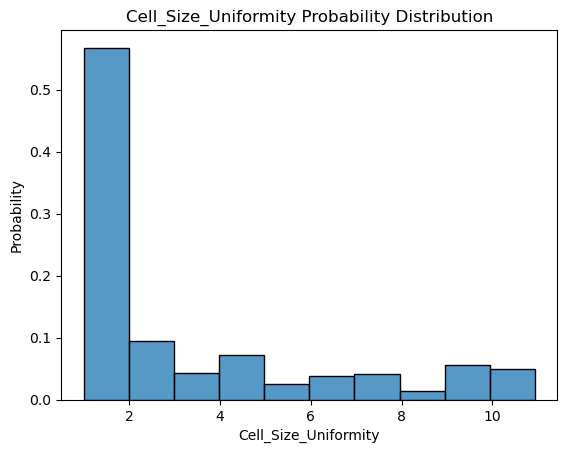

In [20]:
sns.histplot(data=bc_data, x='Cell_Size_Uniformity', stat='probability', bins=10)
plt.xlabel("Cell_Size_Uniformity")
plt.ylabel("Probability")
plt.title('Cell_Size_Uniformity Probability Distribution')
plt.show()

#### Relationship between Cell Size Uniformity and Tumor Class

In [21]:
bc_data.groupby('Class')['Cell_Size_Uniformity'].describe().round(2)

count  mean   std  min   25%   50%   75%    max
Class                                                       
benign     25796.0  1.38  1.06  1.0  1.00  1.00  1.00  10.48
malignant  13521.0  6.47  2.77  1.0  4.24  6.54  9.63  10.93

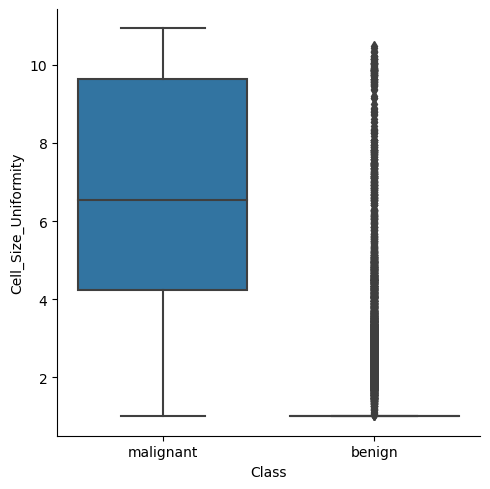

In [22]:
sns.catplot(x="Class", y="Cell_Size_Uniformity", data=bc_data, kind="box")

     Malignant Bins  Tumor Bins
1               232       21323
2               283         506
3              1284        2455
4               956         736
5              2459         349
6               876         105
7              1477          94
8              1468         110
9               456          30
10+            4030          88


Text(0.5, 1.0, 'Cell_Size_Uniformity Feature Distribution grouped by the Tumor Class')

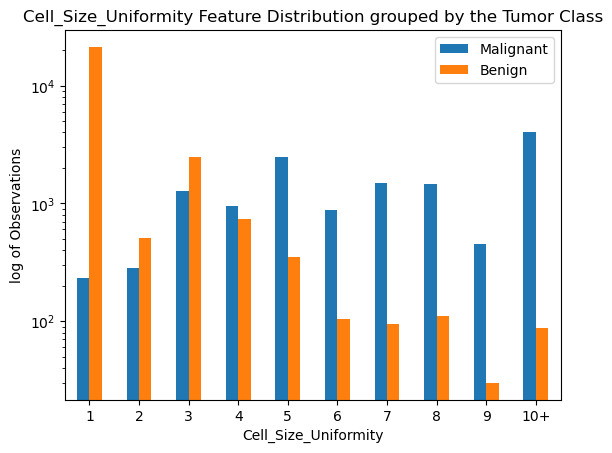

In [23]:
bin_range = ['1', '2','3', '4', '5', '6', '7', '8', '9', '10+']
malignant_bins = pd.cut(bc_data.groupby('Class').get_group('malignant')['Cell_Size_Uniformity'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)
benign_bins = pd.cut(bc_data.groupby('Class').get_group('benign')['Cell_Size_Uniformity'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)

plot_df = pd.DataFrame({'Malignant Bins': malignant_bins.value_counts(sort=False),'Tumor Bins': benign_bins.value_counts(sort=False)}, index=bin_range)
print(plot_df)

#plot a bart chart of the binned data
plot_df.plot.bar(rot=0)
ax = plt.gca()
plt.legend(['Malignant', 'Benign'])
plt.yscale('log')
plt.xlabel('Cell_Size_Uniformity')
plt.ylabel('log of Observations')
plt.title('Cell_Size_Uniformity Feature Distribution grouped by the Tumor Class')

### Feature 4: Marginal Adhesion

In [24]:
bc_data['Marginal_Adhesion'].describe()

count    39317.000000
mean         2.826947
std          2.872436
min          1.000000
25%          1.000000
50%          1.000000
75%          3.551612
max         11.158505
Name: Marginal_Adhesion, dtype: float64

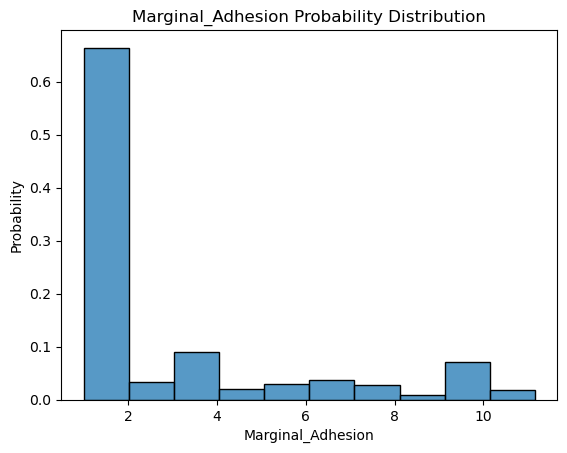

In [25]:
sns.histplot(data=bc_data, x='Marginal_Adhesion', stat='probability', bins=10)
plt.xlabel("Marginal_Adhesion")
plt.ylabel("Probability")
plt.title('Marginal_Adhesion Probability Distribution')
plt.show()

#### Relationship between Marginal Adhesion and Tumor Class

In [26]:
bc_data.groupby('Class')['Marginal_Adhesion'].describe().round(2)

count  mean   std  min   25%   50%   75%    max
Class                                                       
benign     25796.0  1.45  1.26  1.0  1.00  1.00  1.00  10.74
malignant  13521.0  5.46  3.23  1.0  2.74  5.29  8.76  11.16

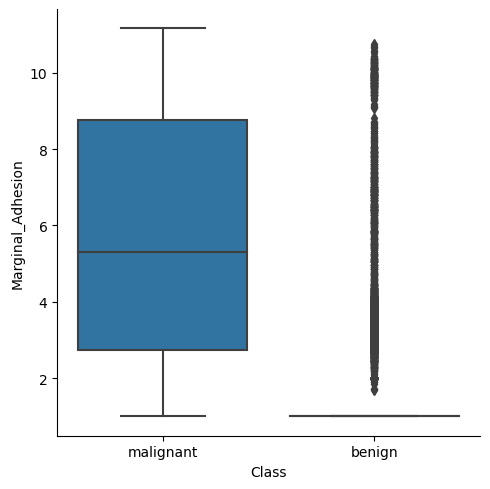

In [27]:
sns.catplot(x="Class", y="Marginal_Adhesion", data=bc_data, kind="box")

     Malignant Bins  Tumor Bins
1              1824       20919
2              1249        2114
3               690         481
4              2169        1377
5               613         241
6              1019         118
7              1293         171
8               975         127
9               359          41
10+            3330         207


Text(0.5, 1.0, 'Marginal_Adhesion Feature Distribution grouped by the Tumor Class')

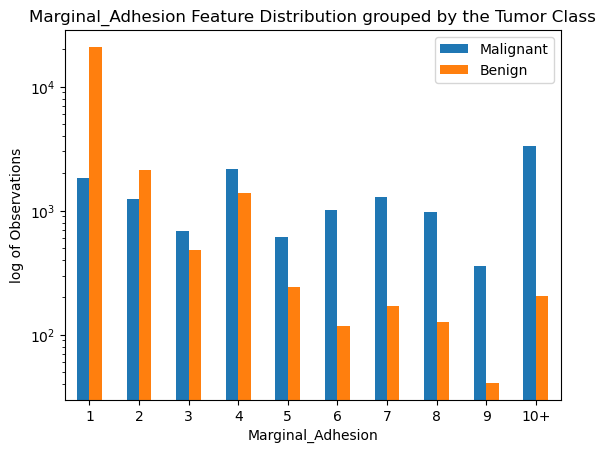

In [28]:
bin_range = ['1', '2','3', '4', '5', '6', '7', '8', '9', '10+']
malignant_bins = pd.cut(bc_data.groupby('Class').get_group('malignant')['Marginal_Adhesion'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)
benign_bins = pd.cut(bc_data.groupby('Class').get_group('benign')['Marginal_Adhesion'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)

plot_df = pd.DataFrame({'Malignant Bins': malignant_bins.value_counts(sort=False),'Tumor Bins': benign_bins.value_counts(sort=False)}, index=bin_range)
print(plot_df)

#plot a bart chart of the binned data
plot_df.plot.bar(rot=0)
ax = plt.gca()
plt.legend(['Malignant', 'Benign'])
plt.yscale('log')
plt.xlabel('Marginal_Adhesion')
plt.ylabel('log of Observations')
plt.title('Marginal_Adhesion Feature Distribution grouped by the Tumor Class')

### Feature 5: Single Epi Cell Size

In [29]:
bc_data['Single_Epi_Cell_Size'].describe()

count    39317.000000
mean         3.209550
std          2.220396
min          1.000000
25%          2.000000
50%          2.000000
75%          4.002653
max         14.414889
Name: Single_Epi_Cell_Size, dtype: float64

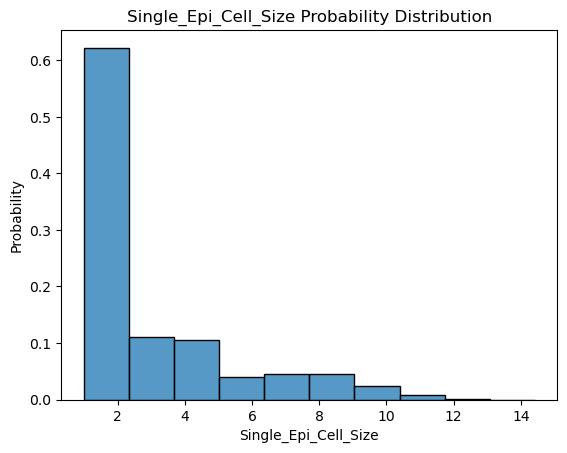

In [30]:
sns.histplot(data=bc_data, x='Single_Epi_Cell_Size', stat='probability', bins=10)
plt.xlabel("Single_Epi_Cell_Size")
plt.ylabel("Probability")
plt.title('Single_Epi_Cell_Size Probability Distribution')
plt.show()

#### Relationship between Single Epi Cell Size and Tumor Class

In [31]:
bc_data.groupby('Class')['Single_Epi_Cell_Size'].describe().round(2)

count  mean   std  min  25%   50%   75%    max
Class                                                      
benign     25796.0  2.15  1.04  1.0  2.0  2.00  2.00  12.91
malignant  13521.0  5.23  2.46  1.0  3.0  4.64  7.19  14.41

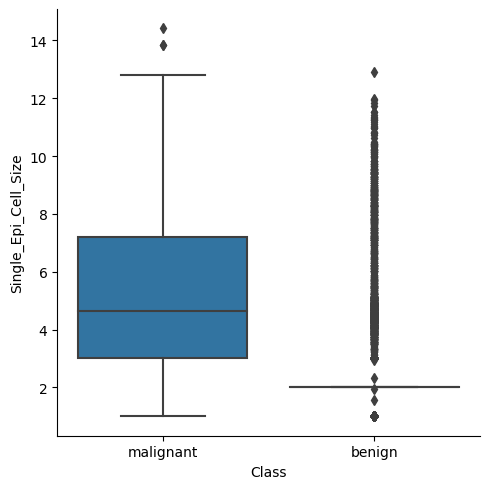

In [32]:
sns.catplot(x="Class", y="Single_Epi_Cell_Size", data=bc_data, kind="box")

     Malignant Bins  Tumor Bins
1               161        2655
2              1389       20261
3              2357        1610
4               897         148
5              2914         518
6              1092         144
7              1072          85
8              1300         122
9              1143         124
10+            1196         129


Text(0.5, 1.0, 'Single_Epi_Cell_Size Feature Distribution grouped by the Tumor Class')

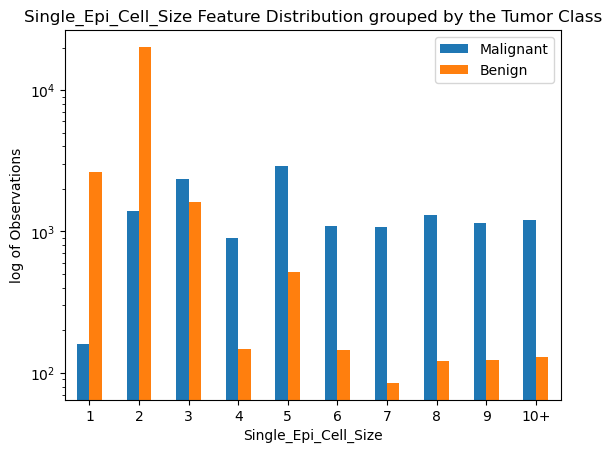

In [33]:
bin_range = ['1', '2','3', '4', '5', '6', '7', '8', '9', '10+']
malignant_bins = pd.cut(bc_data.groupby('Class').get_group('malignant')['Single_Epi_Cell_Size'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)
benign_bins = pd.cut(bc_data.groupby('Class').get_group('benign')['Single_Epi_Cell_Size'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)

plot_df = pd.DataFrame({'Malignant Bins': malignant_bins.value_counts(sort=False),'Tumor Bins': benign_bins.value_counts(sort=False)}, index=bin_range)
print(plot_df)

#plot a bart chart of the binned data
plot_df.plot.bar(rot=0)
ax = plt.gca()
plt.legend(['Malignant', 'Benign'])
plt.yscale('log')
plt.xlabel('Single_Epi_Cell_Size')
plt.ylabel('log of Observations')
plt.title('Single_Epi_Cell_Size Feature Distribution grouped by the Tumor Class')

### Feature 6: Bare Nuclei

In [34]:
bc_data['Bare_Nuclei'].describe()

count    39317.000000
mean         3.500404
std          3.620691
min          1.000000
25%          1.000000
50%          1.000000
75%          6.338096
max         13.160789
Name: Bare_Nuclei, dtype: float64

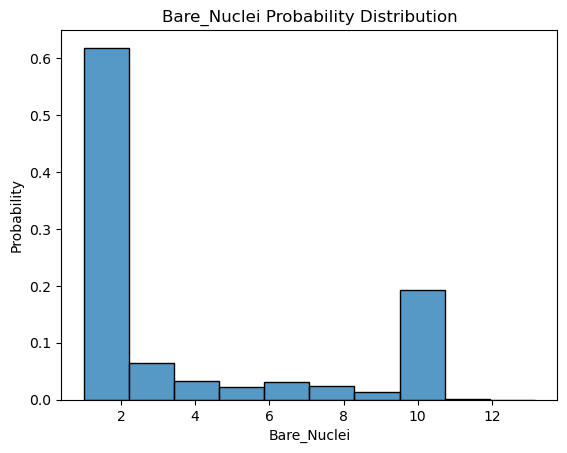

In [35]:
sns.histplot(data=bc_data, x='Bare_Nuclei', stat='probability', bins=10)
plt.xlabel("Bare_Nuclei")
plt.ylabel("Probability")
plt.title('Bare_Nuclei Probability Distribution')
plt.show()

#### Relationship between Bare Nuclei and Tumor Class

In [36]:
bc_data.groupby('Class')['Bare_Nuclei'].describe().round(2)

count  mean   std  min   25%   50%   75%    max
Class                                                       
benign     25796.0  1.46  1.49  1.0  1.00   1.0   1.0  11.99
malignant  13521.0  7.40  3.27  1.0  4.49  10.0  10.0  13.16

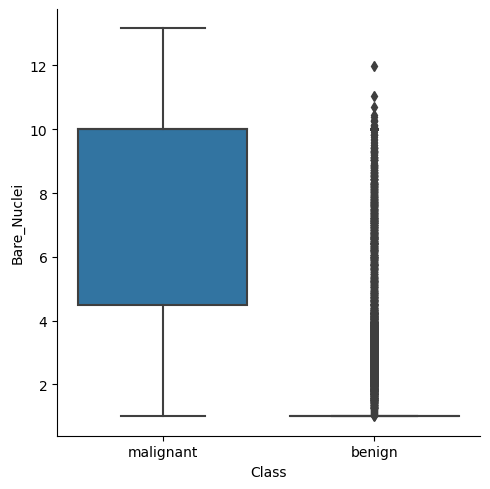

In [37]:
sns.catplot(x="Class", y="Bare_Nuclei", data=bc_data, kind="box")

     Malignant Bins  Tumor Bins
1              1043       22318
2               290         310
3               941        1041
4               854         855
5               489         256
6               600         165
7               834         198
8               716         178
9               413         108
10+            7341         367


Text(0.5, 1.0, 'Bare_Nuclei Feature Distribution grouped by the Tumor Class')

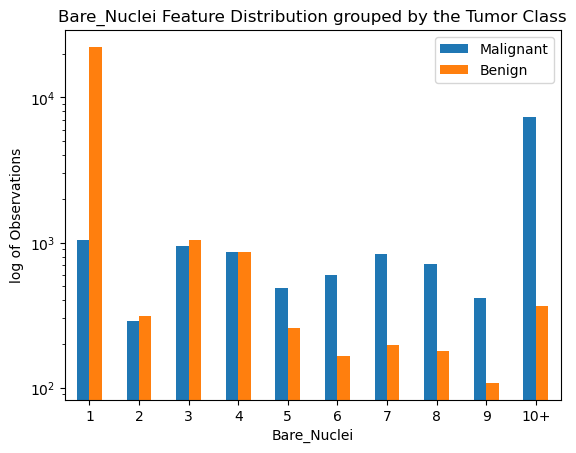

In [38]:
bin_range = ['1', '2','3', '4', '5', '6', '7', '8', '9', '10+']
malignant_bins = pd.cut(bc_data.groupby('Class').get_group('malignant')['Bare_Nuclei'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)
benign_bins = pd.cut(bc_data.groupby('Class').get_group('benign')['Bare_Nuclei'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)

plot_df = pd.DataFrame({'Malignant Bins': malignant_bins.value_counts(sort=False),'Tumor Bins': benign_bins.value_counts(sort=False)}, index=bin_range)
print(plot_df)

#plot a bart chart of the binned data
plot_df.plot.bar(rot=0)
ax = plt.gca()
plt.legend(['Malignant', 'Benign'])
plt.yscale('log')
plt.xlabel('Bare_Nuclei')
plt.ylabel('log of Observations')
plt.title('Bare_Nuclei Feature Distribution grouped by the Tumor Class')

### Feature 7: Bland Chromatin

In [39]:
bc_data['Bland_Chromatin'].describe()

count    39317.000000
mean         3.408230
std          2.421583
min          1.000000
25%          2.000000
50%          3.000000
75%          4.559898
max         12.005376
Name: Bland_Chromatin, dtype: float64

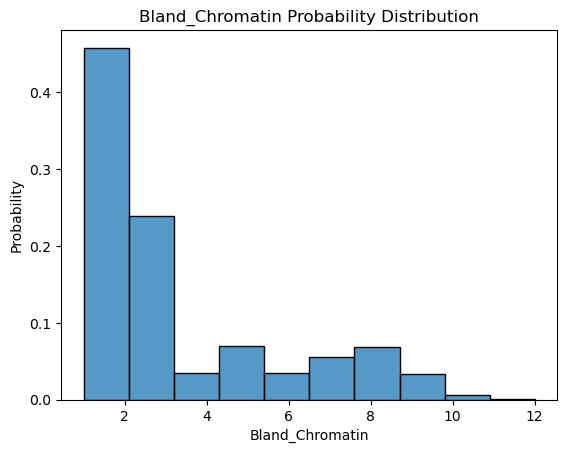

In [40]:
sns.histplot(data=bc_data, x='Bland_Chromatin', stat='probability', bins=10)
plt.xlabel("Bland_Chromatin")
plt.ylabel("Probability")
plt.title('Bland_Chromatin Probability Distribution')
plt.show()

#### Relationship between Bland Chromatin and Tumor Class

In [41]:
bc_data.groupby('Class')['Bland_Chromatin'].describe().round(2)

count  mean   std  min   25%   50%   75%    max
Class                                                       
benign     25796.0  2.14  1.20  1.0  1.00  2.00  3.00  11.61
malignant  13521.0  5.83  2.31  1.0  3.94  5.76  7.83  12.01

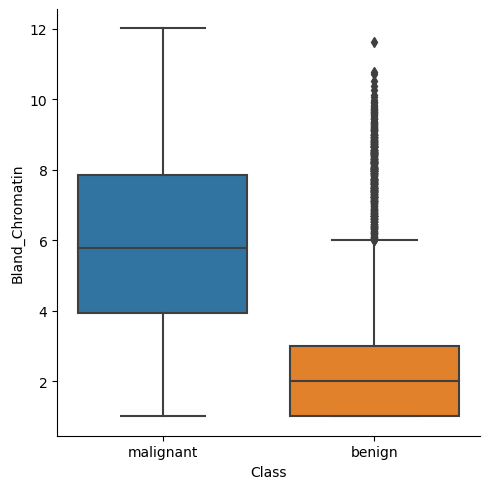

In [42]:
sns.catplot(x="Class", y="Bland_Chromatin", data=bc_data, kind="box")

     Malignant Bins  Tumor Bins
1               246        8457
2               516        8800
3              2041        7315
4               659         127
5              2095         410
6              1427         228
7              1306          97
8              2251         150
9              2006         151
10+             974          61


Text(0.5, 1.0, 'Bland_Chromatin Feature Distribution grouped by the Tumor Class')

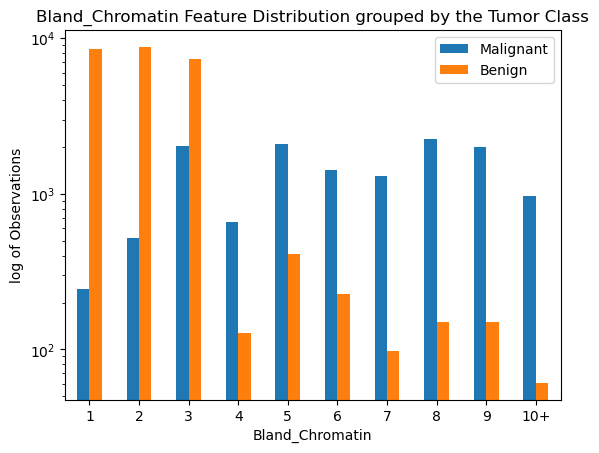

In [43]:
bin_range = ['1', '2','3', '4', '5', '6', '7', '8', '9', '10+']
malignant_bins = pd.cut(bc_data.groupby('Class').get_group('malignant')['Bland_Chromatin'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)
benign_bins = pd.cut(bc_data.groupby('Class').get_group('benign')['Bland_Chromatin'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)

plot_df = pd.DataFrame({'Malignant Bins': malignant_bins.value_counts(sort=False),'Tumor Bins': benign_bins.value_counts(sort=False)}, index=bin_range)
print(plot_df)

#plot a bart chart of the binned data
plot_df.plot.bar(rot=0)
ax = plt.gca()
plt.legend(['Malignant', 'Benign'])
plt.yscale('log')
plt.xlabel('Bland_Chromatin')
plt.ylabel('log of Observations')
plt.title('Bland_Chromatin Feature Distribution grouped by the Tumor Class')

### Feature 8: Normal Nucleoli

In [44]:
bc_data['Normal_Nucleoli'].describe()

count    39317.000000
mean         2.894197
std          3.069320
min          1.000000
25%          1.000000
50%          1.000000
75%          3.793476
max         10.700432
Name: Normal_Nucleoli, dtype: float64

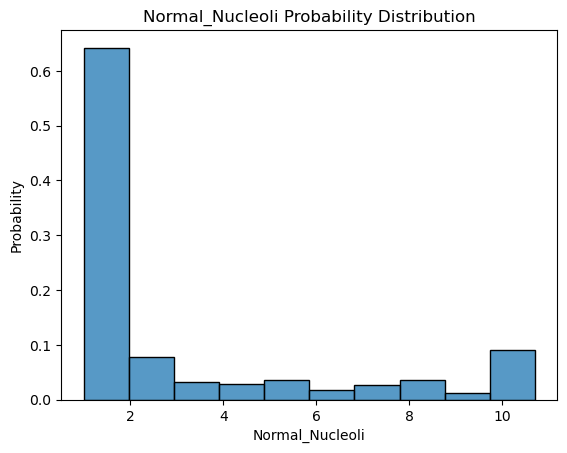

In [45]:
sns.histplot(data=bc_data, x='Normal_Nucleoli', stat='probability', bins=10)
plt.xlabel("Normal_Nucleoli")
plt.ylabel("Probability")
plt.title('Normal_Nucleoli Probability Distribution')
plt.show()

#### Relationship between Normal_Nucleoli and Tumor Class

In [46]:
bc_data.groupby('Class')['Normal_Nucleoli'].describe().round(2)

count  mean   std  min   25%   50%   75%    max
Class                                                       
benign     25796.0  1.38  1.29  1.0  1.00  1.00   1.0  10.70
malignant  13521.0  5.78  3.39  1.0  2.54  5.66  10.0  10.56

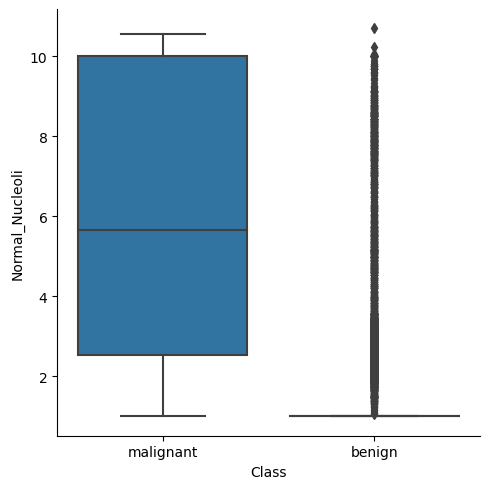

In [47]:
sns.catplot(x="Class", y="Normal_Nucleoli", data=bc_data, kind="box")

     Malignant Bins  Tumor Bins
1              2303       22402
2               280         313
3              1562        1614
4               676         494
5              1069         165
6              1193         174
7               581          91
8              1132         185
9              1050         188
10+            3675         170


Text(0.5, 1.0, 'Normal_Nucleoli Feature Distribution grouped by the Tumor Class')

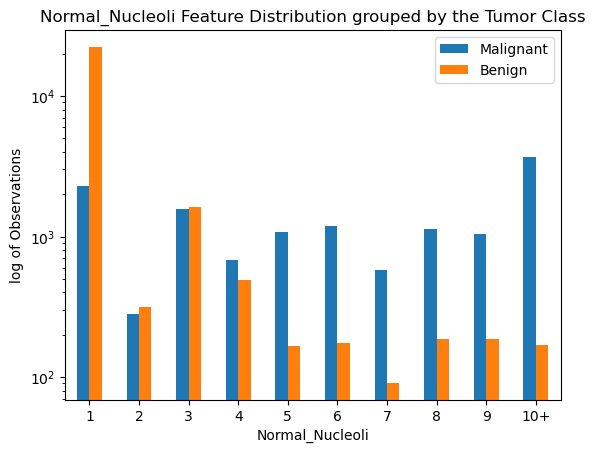

In [48]:
bin_range = ['1', '2','3', '4', '5', '6', '7', '8', '9', '10+']
malignant_bins = pd.cut(bc_data.groupby('Class').get_group('malignant')['Normal_Nucleoli'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)
benign_bins = pd.cut(bc_data.groupby('Class').get_group('benign')['Normal_Nucleoli'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)

plot_df = pd.DataFrame({'Malignant Bins': malignant_bins.value_counts(sort=False),'Tumor Bins': benign_bins.value_counts(sort=False)}, index=bin_range)
print(plot_df)

#plot a bart chart of the binned data
plot_df.plot.bar(rot=0)
ax = plt.gca()
plt.legend(['Malignant', 'Benign'])
plt.yscale('log')
plt.xlabel('Normal_Nucleoli')
plt.ylabel('log of Observations')
plt.title('Normal_Nucleoli Feature Distribution grouped by the Tumor Class')

### Feature 9: Mitoses

In [49]:
bc_data['Mitoses'].describe()

count    39317.000000
mean         1.591045
std          1.705605
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.044924
Name: Mitoses, dtype: float64

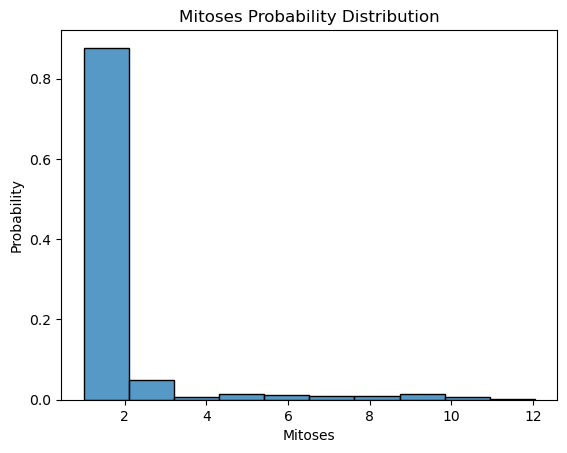

In [50]:
sns.histplot(data=bc_data, x='Mitoses', stat='probability', bins=10)
plt.xlabel("Mitoses")
plt.ylabel("Probability")
plt.title('Mitoses Probability Distribution')
plt.show()

#### Relationship between Mitoses and Tumor labels

In [51]:
bc_data.groupby('Class')['Mitoses'].describe().round(2)

count  mean   std  min  25%  50%  75%    max
Class                                                    
benign     25796.0  1.08  0.63  1.0  1.0  1.0  1.0  11.30
malignant  13521.0  2.57  2.50  1.0  1.0  1.0  3.0  12.04

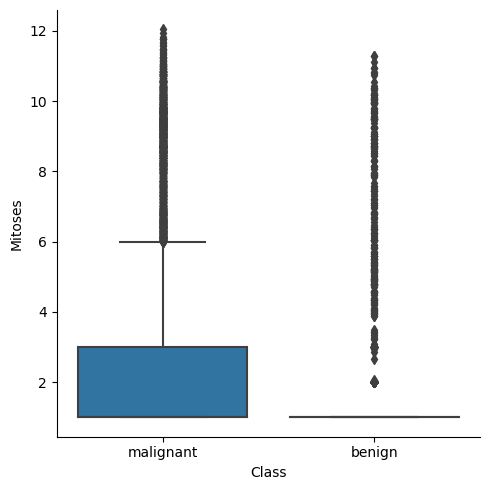

In [52]:
sns.catplot(x="Class", y="Mitoses", data=bc_data, kind="box")

     Malignant Bins  Tumor Bins
1              7533       24980
2              1514         461
3              1792         133
4               176          14
5               431          37
6               477          36
7               356          26
8               217          23
9               350          27
10+             675          59


Text(0.5, 1.0, 'Mitoses Feature Distribution grouped by the Tumor Class')

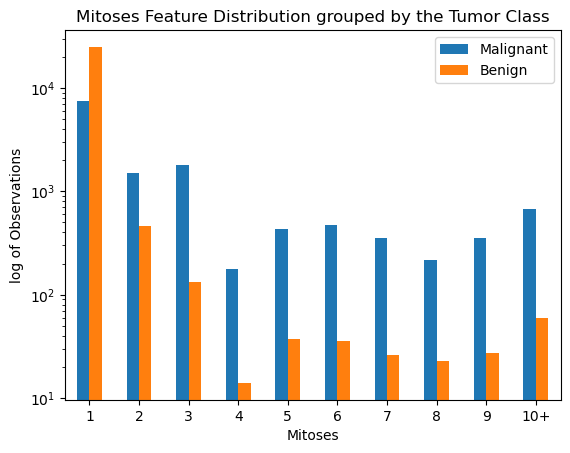

In [53]:
bin_range = ['1', '2','3', '4', '5', '6', '7', '8', '9', '10+']
malignant_bins = pd.cut(bc_data.groupby('Class').get_group('malignant')['Mitoses'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)
benign_bins = pd.cut(bc_data.groupby('Class').get_group('benign')['Mitoses'].clip(upper=10), [0,1,2,3,4,5,6,7,8,9,np.inf],right=True, labels=bin_range)

plot_df = pd.DataFrame({'Malignant Bins': malignant_bins.value_counts(sort=False),'Tumor Bins': benign_bins.value_counts(sort=False)}, index=bin_range)
print(plot_df)

#plot a bart chart of the binned data
plot_df.plot.bar(rot=0)
ax = plt.gca()
plt.legend(['Malignant', 'Benign'])
plt.yscale('log')
plt.xlabel('Mitoses')
plt.ylabel('log of Observations')
plt.title('Mitoses Feature Distribution grouped by the Tumor Class')

### Relationship between the features

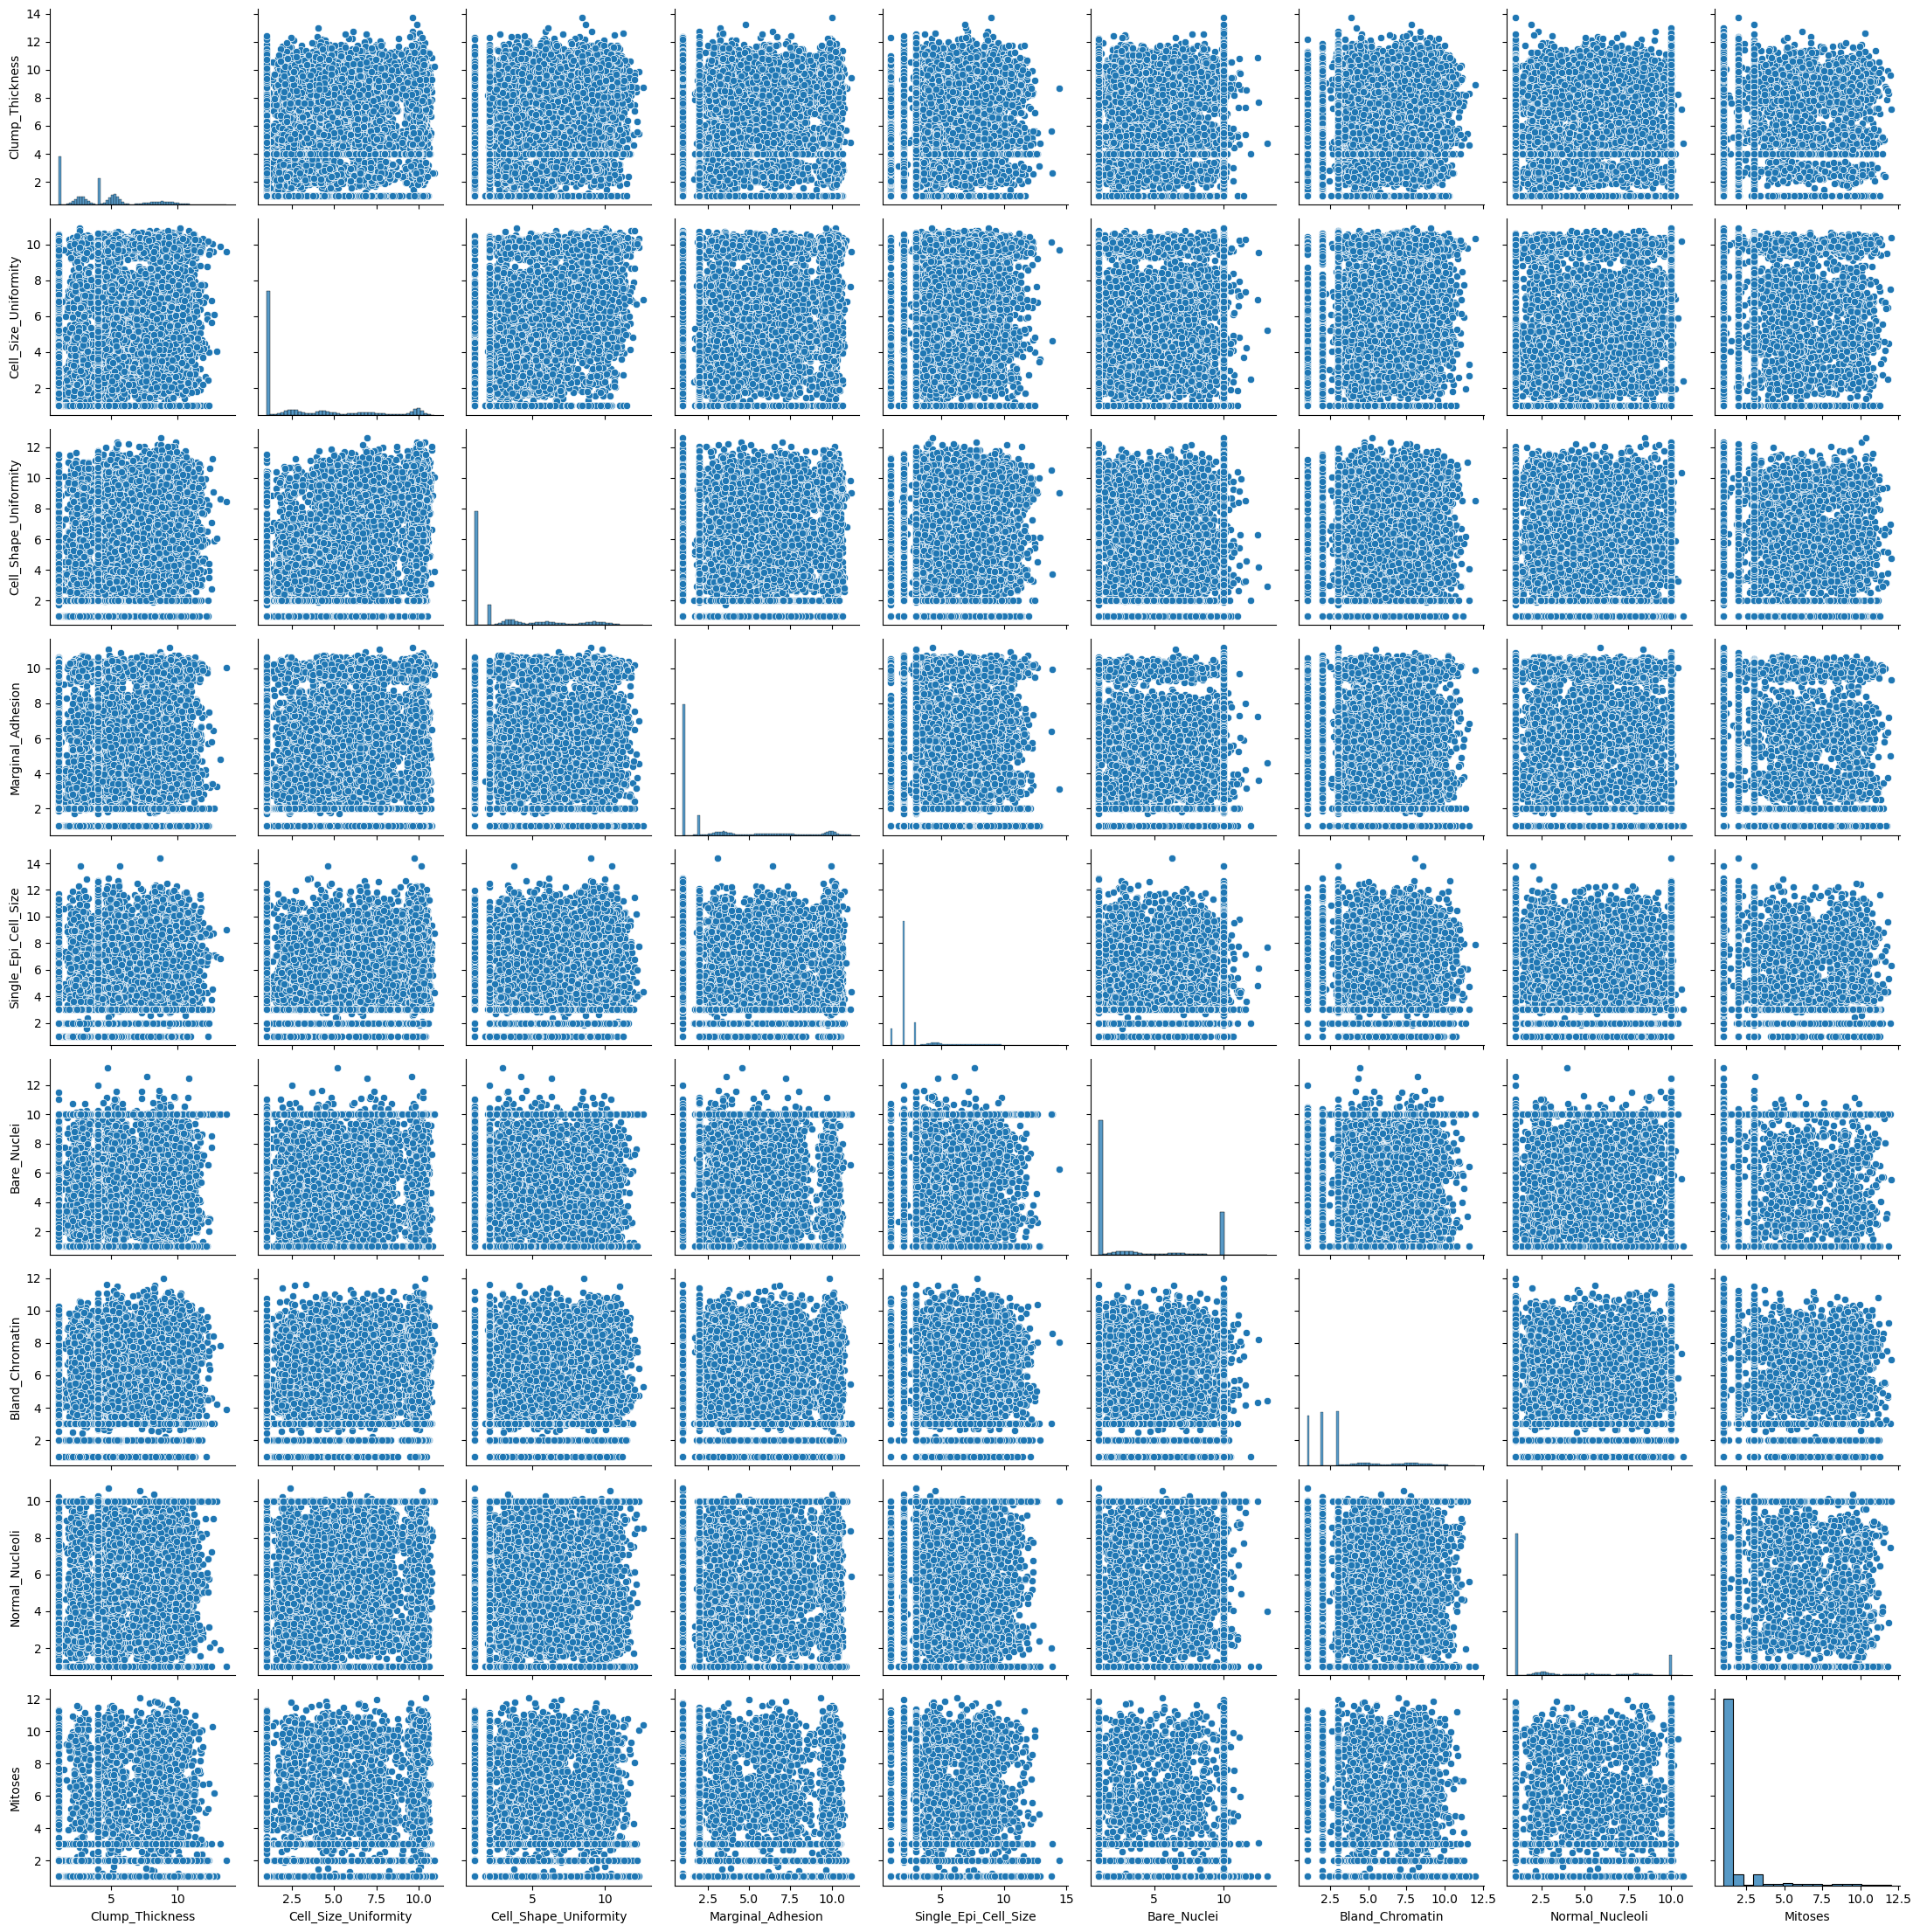

In [54]:
sns.pairplot(bc_data.drop(['id'],axis=1))

The pairplot above depicts no meaningful pairwise relationships between all major features of the dataset. 

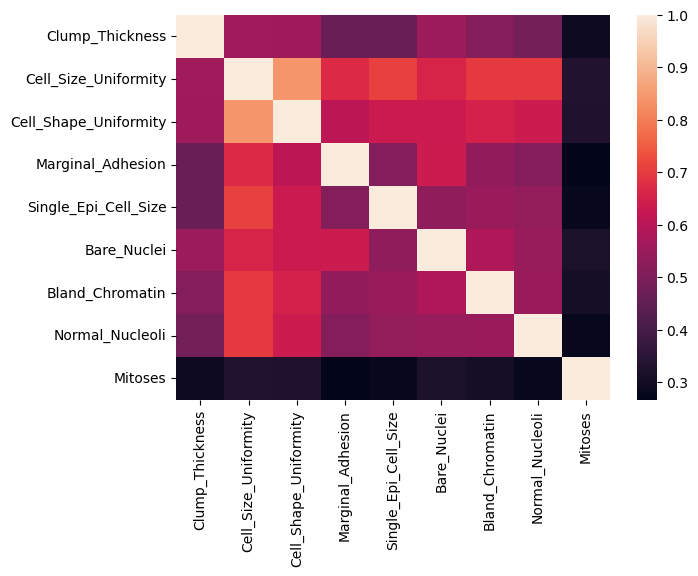

In [55]:
#correlation heatmap
plt.subplots(figsize=(7,5))
sns.heatmap(bc_data.drop('id',axis=1).corr());

In [56]:
#feature covariance matrix
bc_data.drop('id',axis=1).cov()

Clump_Thickness  Cell_Size_Uniformity  \
Clump_Thickness               7.906583              4.789613   
Cell_Size_Uniformity          4.789613              9.237257   
Cell_Shape_Uniformity         4.664482              7.608172   
Marginal_Adhesion             3.762944              5.839281   
Single_Epi_Cell_Size          2.901838              4.780862   
Bare_Nuclei                   5.628302              7.239891   
Bland_Chromatin               3.482323              5.133039   
Normal_Nucleoli               4.176530              6.509977   
Mitoses                       1.391650              1.712905   

                       Cell_Shape_Uniformity  Marginal_Adhesion  \
Clump_Thickness                     4.664482           3.762944   
Cell_Size_Uniformity                7.608172           5.839281   
Cell_Shape_Uniformity               8.855122           5.206598   
Marginal_Adhesion                   5.206598           8.250888   
Single_Epi_Cell_Size                4.172742           3.258397   
Bare_Nuclei                         6.817931           6.592957   
Bland_Chromatin                     4.698327           3.727048   
Normal_Nucleoli                     5.801433           4.513841   
Mitoses                             1.664281           1.306119   

                       Single_Epi_Cell_Size  Bare_Nuclei  Bland_Chromatin  \
Clump_Thickness                    2.901838     5.628302         3.482323   
Cell_Size_Uniformity               4.780862     7.239891         5.133039   
Cell_Shape_Uniformity              4.172742     6.817931         4.698327   
Marginal_Adhesion                  3.258397     6.592957         3.727048   
Single_Epi_Cell_Size               4.930160     4.268245         2.944598   
Bare_Nuclei                        4.268245    13.109400         5.112042   
Bland_Chromatin                    2.944598     5.112042         5.864066   
Normal_Nucleoli                    3.661983     6.075472         4.080528   
Mitoses                            1.063081     1.980346         1.257359   

                       Normal_Nucleoli   Mitoses  
Clump_Thickness               4.176530  1.391650  
Cell_Size_Uniformity          6.509977  1.712905  
Cell_Shape_Uniformity         5.801433  1.664281  
Marginal_Adhesion             4.513841  1.306119  
Single_Epi_Cell_Size          3.661983  1.063081  
Bare_Nuclei                   6.075472  1.980346  
Bland_Chromatin               4.080528  1.257359  
Normal_Nucleoli               9.420723  1.469531  
Mitoses                       1.469531  2.909088

In [57]:
#feature spearman rank correlation matrix
bc_data.drop('id',axis=1).corr(method='spearman')

Clump_Thickness  Cell_Size_Uniformity  \
Clump_Thickness               1.000000              0.560428   
Cell_Size_Uniformity          0.560428              1.000000   
Cell_Shape_Uniformity         0.541110              0.856110   
Marginal_Adhesion             0.470575              0.719441   
Single_Epi_Cell_Size          0.493262              0.747843   
Bare_Nuclei                   0.538937              0.709490   
Bland_Chromatin               0.473369              0.684476   
Normal_Nucleoli               0.481638              0.740366   
Mitoses                       0.342135              0.438833   

                       Cell_Shape_Uniformity  Marginal_Adhesion  \
Clump_Thickness                     0.541110           0.470575   
Cell_Size_Uniformity                0.856110           0.719441   
Cell_Shape_Uniformity               1.000000           0.653586   
Marginal_Adhesion                   0.653586           1.000000   
Single_Epi_Cell_Size                0.681495           0.583684   
Bare_Nuclei                         0.672642           0.677139   
Bland_Chromatin                     0.639142           0.546275   
Normal_Nucleoli                     0.674534           0.571755   
Mitoses                             0.422812           0.361011   

                       Single_Epi_Cell_Size  Bare_Nuclei  Bland_Chromatin  \
Clump_Thickness                    0.493262     0.538937         0.473369   
Cell_Size_Uniformity               0.747843     0.709490         0.684476   
Cell_Shape_Uniformity              0.681495     0.672642         0.639142   
Marginal_Adhesion                  0.583684     0.677139         0.546275   
Single_Epi_Cell_Size               1.000000     0.608908         0.574954   
Bare_Nuclei                        0.608908     1.000000         0.584451   
Bland_Chromatin                    0.574954     0.584451         1.000000   
Normal_Nucleoli                    0.607366     0.600037         0.560669   
Mitoses                            0.385280     0.414837         0.372083   

                       Normal_Nucleoli   Mitoses  
Clump_Thickness               0.481638  0.342135  
Cell_Size_Uniformity          0.740366  0.438833  
Cell_Shape_Uniformity         0.674534  0.422812  
Marginal_Adhesion             0.571755  0.361011  
Single_Epi_Cell_Size          0.607366  0.385280  
Bare_Nuclei                   0.600037  0.414837  
Bland_Chromatin               0.560669  0.372083  
Normal_Nucleoli               1.000000  0.372774  
Mitoses                       0.372774  1.000000

By all three correlation metrics depicted above, 'Cell_Size_Uniformity' and 'Cell_Shape_Uniformity' have the strongest positive correlation.

## 5. EDA Conclusions

- The dataset is imbalanced for the 'Class' target variable, which must be accounted for while modeling
- With the exception of 'Clump_Thickness', all other features in the dataset are skewed to the right
- In the bar charts created for each feature grouped by the target variable, there is a very clear seperation of values that correspond to either 'Benign' or 'Malignant' target categories. 
- Among all features in the dataset, 'Cell_Size_Uniformity' and 'Cell_Shape_Uniformity' are the most positively correlated.